In [1]:
#GPU load
!nvidia-smi

Mon Jun 15 08:20:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:07.0 Off |                    0 |
| N/A   30C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
!pwd


/tf/Dancing2Music


In [115]:
import urllib.request
import shutil
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


import numpy as np
import pickle
import cv2
import math
import os
import random
import tensorflow as tf

In [116]:
# get list of similar arrays and look at size
a = glob.glob("/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit*/*.npy")
a.sort()

#There is the same numpy array in unit and unitseq3, but some are missing from unitseq4
# all unit files are size (32, 14, 2)
# some unitseq3 files are (3, 32, 14, 2) but most are (4, 32, 14, 2)
# all unitseq 4 are size (4, 32, 14, 2)

for i in a:
    print(i, np.load(i).shape)

/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/0.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/1.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/2.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/3.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/4.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/5.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/6.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/7.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unit/8.npy (32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unitseq3/0.npy (3, 32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unitseq3/1.npy (4, 32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unitseq3/2.npy (3, 32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unitseq3/3.npy (3, 32, 14, 2)
/data/Dancing2Music/data/ballet/-0APC9DynPE/1/unitseq3/4.npy (3, 32, 14, 2)

In [117]:
pose1 = np.load("/data/Dancing2Music/data/ballet/_2gDwnq9OqA/2/unit/0.npy")
pose3 = np.load("/data/Dancing2Music/data/ballet/_2gDwnq9OqA/2/unitseq3/0.npy")
pose4 = np.load("/data/Dancing2Music/data/ballet/_2gDwnq9OqA/2/unitseq4/0.npy")

**Note you need to define the functions at the bottom of the notebook before this will work**

In [118]:
print(pose1.shape, '\n', pose1[0,:,:])
vis_single(pose1[0,:,:], "outfile1.jpg")

(32, 14, 2) 
 [[247.22700814  49.08731797]
 [248.71295849  70.51837681]
 [229.58777956  71.4694339 ]
 [205.36974149  79.84703625]
 [167.10642368  84.18616436]
 [267.44028592  70.52507392]
 [294.59371891  74.12963798]
 [324.41178672  76.30447898]
 [239.17432366 128.11874807]
 [242.43649105 179.62138138]
 [247.97781637 227.81639453]
 [263.02442639 127.08738864]
 [260.85777105 178.48970602]
 [256.0980707  226.13572151]]


In [119]:
print(pose3.shape, '\n', pose3[0,0,:,:])
vis_single(pose3[0,0,:,:], "outfile3.jpg")

(4, 32, 14, 2) 
 [[237.89375203  54.53232747]
 [240.10772415  68.9645547 ]
 [222.16958097  70.36139995]
 [200.92980356  88.93999392]
 [170.82309542 102.83667178]
 [257.598656    68.29649828]
 [286.5514485   75.43531611]
 [318.37522729  81.92816202]
 [232.85296264 122.74585747]
 [239.95865371 169.60918751]
 [257.65509419 215.69281166]
 [255.24665569 119.36140633]
 [259.42062807 157.20321407]
 [255.67730364 209.56006595]]


In [120]:
print(pose4.shape, '\n', pose4[0,0,:,:])
vis_single(pose4[0,0,:,:], "outfile4.jpg")

(4, 32, 14, 2) 
 [[237.89375203  54.53232747]
 [240.10772415  68.9645547 ]
 [222.16958097  70.36139995]
 [200.92980356  88.93999392]
 [170.82309542 102.83667178]
 [257.598656    68.29649828]
 [286.5514485   75.43531611]
 [318.37522729  81.92816202]
 [232.85296264 122.74585747]
 [239.95865371 169.60918751]
 [257.65509419 215.69281166]
 [255.24665569 119.36140633]
 [259.42062807 157.20321407]
 [255.67730364 209.56006595]]


In [121]:
(pose3 == pose4).all()

True

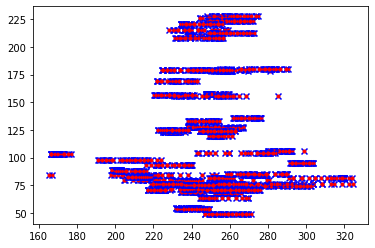

In [251]:
# plt.plot(pose1[0,:,:])
for i in range(4):
    for j in range(32):
        plt.scatter(pose3[i,j,:,0],pose3[i,0,:,1], color = 'b', marker = "x")
        plt.scatter(pose4[i,j,:,0],pose4[i,0,:,1], color = 'r', marker = ".")

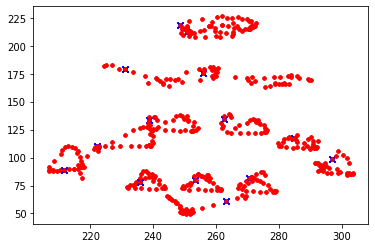

In [296]:
# plt.plot(pose1[0,:,:])
for i in range(4):
    plt.scatter(pose3[1,30,:,0],pose3[1,30,:,1], color = 'b', marker = "x")
    for j in range(32):
        
        plt.scatter(pose3[2,j ,:,0],pose3[2,j ,:,1], color = 'r', marker = ".")

## Thoughts on array dimensions

*Array dimension of 14*: Chose 14 most relevant keypoints to represent the dancing poses, i.e., nose, neck, left and right shoulders, elbows, wrists, hips, knees, and ankles
Note: limbSeq are the attached limbs - i.e.

*array dimension of 2*: There are an x and y coordinate for each limb position.

*Array dimension of 32*: In the decomposition phase, we set the length of a dance unit as 32 frames 

*Array of dimension 3 or 4* ??? the number of beat times within a dance unit as 4. In the composition phase, each input sequence contains 3 to 5 dance units.

### Things left
Figure out better how to join the sequences together to train a language model and what the  4th (3rd) dimension array is all about?? Seems to be connected sequences of dance from the annimations - but need to confirm this with more examples.

##  Create animations from videos

In [284]:
def make_video(images, outvid=None, fps=15, size=None,
               is_color=True, format='MP42'):
    """
    Create a video from a list of images.
 
    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
 
    The function relies on http://opencv-python-tutroals.readthedocs.org/en/latest/.
    By default, the video will have the size of the first image.
    It will resize every image to this size before adding them to the video.
    MODIFIED FROM: http://www.xavierdupre.fr/blog/2016-03-30_nojs.html
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        #print(image)
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid


In [123]:
#POSE 1
vis(pose1, 'vis1', aud=None)
vis(pose3[1,:,:,:], 'vis3_2', aud=None)
vis(pose4[1,:,:,:], 'vis4_2', aud=None)
pose4[:,:,:,:].shape

images1 = glob.glob("vis1/*")
images1.sort()
images3 = glob.glob("vis3_1/*")
images3.sort()
make_video(images3, outvid = './vis3_1_out.avi')
images4 = glob.glob("vis4_1/*")
images4.sort()
make_video(images4, outvid = './vis4_1_out.avi')


<VideoWriter 0x7f8e7a84df10>

In [86]:
vis(pose3[2,:,:,:], 'vis3_2', aud=None)
vis(pose4[2,:,:,:], 'vis4_2', aud=None)
pose4[:,:,:,:].shape

images3 = glob.glob("vis3_2/*")
images3.sort()
make_video(images3, outvid = './vis3_2_out.avi')

images4 = glob.glob("vis4_2/*")
images4.sort()
make_video(images4, outvid = './vis4_2_out.avi')

<VideoWriter 0x7f8e7a7b7710>

In [231]:
vis(pose3[3,:,:,:], 'vis3_3', aud=None)
vis(pose4[3,:,:,:], 'vis4_3', aud=None)
pose4[:,:,:,:].shape

images3 = glob.glob("vis3_3/*")
images3.sort()
make_video(images3, outvid = './vis3_3_out.avi')

images4 = glob.glob("vis4_3/*")
images4.sort()
make_video(images4, outvid = './vis4_3_out.avi')

<VideoWriter 0x7f8e7a1e6c30>

## Longer sequences
Create longer animation of pose3 ("/data/Dancing2Music/data/ballet/_2gDwnq9OqA/2/unitseq3/0.npy")

In [111]:
posenew = np.copy(pose3)
posenew = posenew.reshape(128,14,2)
print(posenew.shape)
vis(posenew, 'vis_posenew', aud=None)

(128, 14, 2)


In [124]:
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose3new_out.avi')

<VideoWriter 0x7f8e7a84dcd0>

Create longer animation of pose4 ("/data/Dancing2Music/data/ballet/_2gDwnq9OqA/2/unitseq4/0.npy")

In [129]:
posenew = np.copy(pose4)
posenew = posenew.reshape(128,14,2)
print(posenew.shape)
vis(posenew, 'vis_posenew', aud=None)

(128, 14, 2)


In [130]:
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose4new_out.avi')

<VideoWriter 0x7f8e7a84dc30>

In [274]:
#can see from frames there are duplicates - try removing them
unique, index, count = np.unique(posenew, axis=0, 
                          return_index=True,
                          return_counts=True)
print ('Unique rows:')
print (unique)
print ('\nIndex of kept rows:')
print (index)
print ('\nCount of duplicate rows')
print (count)

Unique rows:
[[[231.94434074  56.13525643]
  [234.58546966  79.09676968]
  [217.26656621  79.32660817]
  ...
  [250.12169593 132.02925841]
  [252.13644377 183.6708857 ]
  [253.26572731 234.89447899]]

 [[232.05068228  56.16825837]
  [234.62475835  78.22143966]
  [216.9572569   79.30426674]
  ...
  [250.18354091 132.45363091]
  [252.26567993 184.58300318]
  [251.02113207 235.97470779]]

 [[232.44892965  46.42011459]
  [234.11697067  64.54049387]
  [219.15546609  62.65752475]
  ...
  [244.36074459 119.37095272]
  [252.94057463 154.10786977]
  [234.5778319  193.56061674]]

 ...

 [[269.26247334  63.51090909]
  [258.02491735  81.47323527]
  [239.85013671  79.12186866]
  ...
  [264.8732075  135.86324633]
  [260.55421358 179.96314296]
  [255.42985373 223.93059161]]

 [[269.50510628  65.82784898]
  [257.4942535   84.37513562]
  [239.69915008  82.28402112]
  ...
  [264.47868456 137.65729881]
  [258.6020636  177.93164347]
  [256.07651712 214.48899761]]

 [[271.23903283  42.90394738]
  [257.4736

In [285]:
vis(posenew[sorted(index)], 'vis_posenew', aud=None)
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose4unique_out.avi')

<VideoWriter 0x7f8f35bb8fb0>

# sort datafile list and create longer sequences 
Create Longer sequences again by joining seqences with the same folder, i.e. /ballet/_2gDwnq9OqA

In [141]:
data_dir = "/data/Dancing2Music/data/"
tolerance = True
if tolerance:
  z3_fname = '{}/unitList/zumba_unitseq3.txt'.format(data_dir)
  b3_fname = '{}/unitList/ballet_unitseq3.txt'.format(data_dir)
  h3_fname = '{}/unitList/hiphop_unitseq3.txt'.format(data_dir)
  z4_fname = '{}/unitList/zumba_unitseq4.txt'.format(data_dir)
  b4_fname = '{}/unitList/ballet_unitseq4.txt'.format(data_dir)
  h4_fname = '{}/unitList/hiphop_unitseq4.txt'.format(data_dir)
  z3_data = []; b3_data = []; h3_data = []; z4_data = []; b4_data = []; h4_data = []
  with open(z3_fname, 'r') as f:
    for line in f:
      z3_data.append([s for s in line.strip().split(' ')])
  with open(b3_fname, 'r') as f:
    for line in f:
      b3_data.append([s for s in line.strip().split(' ')])
  with open(h3_fname, 'r') as f:
    for line in f:
      h3_data.append([s for s in line.strip().split(' ')])
  with open(z4_fname, 'r') as f:
    for line in f:
      z4_data.append([s for s in line.strip().split(' ')])
  with open(b4_fname, 'r') as f:
    for line in f:
      b4_data.append([s for s in line.strip().split(' ')])
  with open(h4_fname, 'r') as f:
    for line in f:
      h4_data.append([s for s in line.strip().split(' ')])
  zt_data = z3_data + z4_data
  bt_data = b3_data + b4_data
  ht_data = h3_data + h4_data
  t_data = [zt_data, bt_data, ht_data]

In [190]:
def multiple_sort(value):
    values = value[0].split("/")
    key1 = values[2]
    key2 = values[4]
    key3 = values[3]
    key4 = int(values[5].split('.')[0])
    return key1, key2, key3, key4

sorted(bt_data, key=multiple_sort)


[['data/ballet/-0APC9DynPE/1/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/3.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/4.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/1.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/1.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/3.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/4.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/5.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/6.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/7.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/8.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/12.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq4/1.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq4/3.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq4/9.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq4/10.npy'],
 ['data/bal

In [322]:
#join several sequences together

test_f = sorted(bt_data, key=multiple_sort)[4:7]
print(test_f)
test1 = np.array([np.load("/data/Dancing2Music/" + test_f[i][0]).reshape(-1,14,2)
         for i in range(len(test_f))])
print(test1.shape)
final = test1.reshape(test1.shape[0]*test1[0].shape[0],14,2)
final.shape

[['data/ballet/-0APC9DynPE/5/unitseq3/0.npy'], ['data/ballet/-0APC9DynPE/5/unitseq3/1.npy'], ['data/ballet/-0APC9DynPE/5/unitseq3/2.npy']]
(3, 96, 14, 2)


(288, 14, 2)

In [292]:
vis(final, 'vis_posenew', aud=None)
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose_long_new_out.avi')

<VideoWriter 0x7f8f488a6270>

In [293]:
#can see from frames there are duplicates - try removing them
unique, index, count = np.unique(final, axis=0, 
                          return_index=True,
                          return_counts=True)
print ('Unique rows:')
print (unique)
print ('\nIndex of kept rows:')
print (index)
print ('\nCount of duplicate rows')
print (count)

Unique rows:
[[[228.66048922  29.80790076]
  [225.42611487  56.81828566]
  [209.07764824  56.82692346]
  ...
  [237.06314422 117.27229322]
  [240.8234643  167.83986455]
  [241.39643804 218.55811741]]

 [[228.98965996  29.30272595]
  [226.45206774  55.80540046]
  [209.47976036  55.82267605]
  ...
  [237.93265703 117.74606851]
  [241.52214072 167.77617704]
  [238.73693172 218.10764864]]

 [[229.09440428  29.93937384]
  [225.70071061  56.90177099]
  [209.78701299  55.03696703]
  ...
  [237.37708991 117.34522125]
  [240.73335314 167.56824053]
  [240.30530241 218.49284072]]

 ...

 [[268.64070371  27.83010477]
  [263.6019603   49.92200609]
  [251.15914464  52.24077886]
  ...
  [270.53863766 108.28287866]
  [263.91769841 155.20842628]
  [254.30068486 203.59441558]]

 [[269.11260899  27.90706003]
  [261.48827078  49.96237505]
  [248.92885315  50.4281862 ]
  ...
  [269.64312471 107.04644943]
  [263.30336725 153.64344828]
  [254.20464253 203.21823658]]

 [[269.39118586  29.06090273]
  [267.4829

In [294]:
vis(final[sorted(index)], 'vis_posenew', aud=None)
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose_unique_long_new_out.avi')

<VideoWriter 0x7f8f488a61b0>

Can the shorter bit be stuck in a sequence? Look for common frames


In [297]:
sorted(bt_data, key=multiple_sort)

[['data/ballet/-0APC9DynPE/1/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/3.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq3/4.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/1.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/0.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/1.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/2.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/3.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/4.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/5.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/6.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/7.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/8.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq3/12.npy'],
 ['data/ballet/-0APC9DynPE/1/unitseq4/1.npy'],
 ['data/ballet/-0APC9DynPE/5/unitseq4/3.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq4/9.npy'],
 ['data/ballet/-0APC9DynPE/7/unitseq4/10.npy'],
 ['data/bal

In [340]:
test_f = sorted(bt_data, key=multiple_sort)[0:17]
print(test_f)
test1 = np.array([np.load("/data/Dancing2Music/" + test_f[i][0]).reshape(-1,14,2)
         for i in range(len(test_f))])
print(test1.shape)

for i in range(len(test_f)):
    print(test1[i].shape)
    
    
final = test1.reshape(-1,14,2)
final.shape

[['data/ballet/-0APC9DynPE/1/unitseq3/0.npy'], ['data/ballet/-0APC9DynPE/1/unitseq3/2.npy'], ['data/ballet/-0APC9DynPE/1/unitseq3/3.npy'], ['data/ballet/-0APC9DynPE/1/unitseq3/4.npy'], ['data/ballet/-0APC9DynPE/5/unitseq3/0.npy'], ['data/ballet/-0APC9DynPE/5/unitseq3/1.npy'], ['data/ballet/-0APC9DynPE/5/unitseq3/2.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/0.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/1.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/2.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/3.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/4.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/5.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/6.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/7.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/8.npy'], ['data/ballet/-0APC9DynPE/7/unitseq3/12.npy']]
(17, 96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14, 2)
(96, 14,

(1632, 14, 2)

In [341]:
vis(final, 'vis_posenew', aud=None)
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose_verylong_new_out.avi')

<VideoWriter 0x7f8f355f0970>

In [342]:
#can see from frames there are duplicates - try removing them
unique, index, count = np.unique(final, axis=0, 
                          return_index=True,
                          return_counts=True)
vis(final[sorted(index)], 'vis_posenew', aud=None)
imagesnew = glob.glob("vis_posenew/*")

imagesnew.sort()
make_video(imagesnew, outvid = './vis_pose_unique_verylong_new_out.avi')

<VideoWriter 0x7f8f355f08b0>

# Modules from Dancing2Music

In [19]:
# Copyright (c) 2020, NVIDIA Corporation. All rights reserved.
#
# This work is made available
# under the Nvidia Source Code License (1-way Commercial).
# To view a copy of this license, visit
# https://nvlabs.github.io/Dancing2Music/License.txt

import numpy as np
import pickle
import cv2
import math
import os
import random
import tensorflow as tf

class Logger(object):
  def __init__(self, log_dir):
    self.writer = tf.summary.FileWriter(log_dir)

  def scalar_summary(self, tag, value, step):
    summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
    self.writer.add_summary(summary, step)

def vis(poses, outdir, aud=None):
  colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

  # find connection in the specified sequence, center 29 is in the position 15
  limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]

  neglect = [14,15,16,17]

  for t in range(poses.shape[0]):
    #break
    canvas = np.ones((256,500,3), np.uint8)*255

    thisPeak = poses[t]
    for i in range(18):
      if i in neglect:
        continue
      if thisPeak[i,0] == -1:
        continue
      cv2.circle(canvas, tuple(thisPeak[i,0:2].astype(int)), 4, colors[i], thickness=-1)

    for i in range(17):
      limbid = np.array(limbSeq[i])-1
      if limbid[0] in neglect or limbid[1] in neglect:
        continue
      X = thisPeak[[limbid[0],limbid[1]], 1]
      Y = thisPeak[[limbid[0],limbid[1]], 0]
      if X[0] == -1 or Y[0]==-1 or X[1]==-1 or Y[1]==-1:
        continue
      stickwidth = 4
      cur_canvas = canvas.copy()
      mX = np.mean(X)
      mY = np.mean(Y)
      #print(X, Y, limbid)
      length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
      angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
      polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
      #print(i, n, int(mY), int(mX), limbid, X, Y)
      cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
      canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    if aud is not None:
      if aud[:,t] == 1:
        cv2.circle(canvas, (30, 30), 20, (0,0,255), -1)
        #canvas = cv2.copyMakeBorder(canvas,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,0,0])
    cv2.imwrite(os.path.join(outdir, 'frame{0:03d}.png'.format(t)),canvas)

def vis2(poses, outdir, fibeat):
  colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

  # find connection in the specified sequence, center 29 is in the position 15
  limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]


  neglect = [14,15,16,17]

  ibeat = cv2.imread(fibeat);
  ibeat = cv2.resize(ibeat, (500,200))

  for t in range(poses.shape[0]):
    subibeat = ibeat.copy()
    canvas = np.ones((256+200,500,3), np.uint8)*255
    canvas[256:,:,:] = subibeat

    overlay = canvas.copy()
    cv2.rectangle(overlay, (int(500/poses.shape[0]*(t+1)),256),(500,256+200), (100,100,100), -1)
    cv2.addWeighted(overlay, 0.4, canvas, 1-0.4, 0, canvas)
    thisPeak = poses[t]
    for i in range(18):
      if i in neglect:
        continue
      if thisPeak[i,0] == -1:
        continue
      cv2.circle(canvas, tuple(thisPeak[i,0:2].astype(int)), 4, colors[i], thickness=-1)

    for i in range(17):
      limbid = np.array(limbSeq[i])-1
      if limbid[0] in neglect or limbid[1] in neglect:
        continue
      X = thisPeak[[limbid[0],limbid[1]], 1]
      Y = thisPeak[[limbid[0],limbid[1]], 0]
      if X[0] == -1 or Y[0]==-1 or X[1]==-1 or Y[1]==-1:
        continue
      stickwidth = 4
      cur_canvas = canvas.copy()
      mX = np.mean(X)
      mY = np.mean(Y)
      #print(X, Y, limbid)
      length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
      angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
      polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
      #print(i, n, int(mY), int(mX), limbid, X, Y)
      cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
      canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    cv2.imwrite(os.path.join(outdir, 'frame{0:03d}.png'.format(t)),canvas)

def vis_single(pose, outfile):
  colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

  # find connection in the specified sequence, center 29 is in the position 15
  limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]

  neglect = [14,15,16,17]

  for t in range(1):
    #break
    canvas = np.ones((256,500,3), np.uint8)*255

    thisPeak = pose
    for i in range(18):
      if i in neglect:
        continue
      if thisPeak[i,0] == -1:
        continue
      cv2.circle(canvas, tuple(thisPeak[i,0:2].astype(int)), 4, colors[i], thickness=-1)

    for i in range(17):
      limbid = np.array(limbSeq[i])-1
      if limbid[0] in neglect or limbid[1] in neglect:
        continue
      X = thisPeak[[limbid[0],limbid[1]], 1]
      Y = thisPeak[[limbid[0],limbid[1]], 0]
      if X[0] == -1 or Y[0]==-1 or X[1]==-1 or Y[1]==-1:
        continue
      stickwidth = 4
      cur_canvas = canvas.copy()
      mX = np.mean(X)
      mY = np.mean(Y)
      length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
      angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
      polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
      cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
      canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    cv2.imwrite(outfile,canvas)


In [17]:
# Copyright (c) 2020, NVIDIA Corporation. All rights reserved.
#
# This work is made available
# under the Nvidia Source Code License (1-way Commercial).
# To view a copy of this license, visit
# https://nvlabs.github.io/Dancing2Music/License.txt
import os  
import pickle
import numpy as np
import random
import torch.utils.data
from torchvision.datasets import ImageFolder
#import utils


class PoseDataset(torch.utils.data.Dataset):
  def __init__(self, data_dir, tolerance=False):
    self.data_dir = data_dir
    z_fname = '{}/unitList/zumba_unit.txt'.format(data_dir)
    b_fname = '{}/unitList/ballet_unit.txt'.format(data_dir)
    h_fname = '{}/unitList/hiphop_unit.txt'.format(data_dir)
    self.z_data = []
    self.b_data = []
    self.h_data = []
    with open(z_fname, 'r') as f:
      for line in f:
        self.z_data.append([s for s in line.strip().split(' ')])
    with open(b_fname, 'r') as f:
      for line in f:
        self.b_data.append([s for s in line.strip().split(' ')])
    with open(h_fname, 'r') as f:
      for line in f:
        self.h_data.append([s for s in line.strip().split(' ')])
    self.data = [self.z_data, self.b_data, self.h_data]

    self.tolerance = tolerance
    if self.tolerance:
      z3_fname = '{}/unitList/zumba_unitseq3.txt'.format(data_dir)
      b3_fname = '{}/unitList/ballet_unitseq3.txt'.format(data_dir)
      h3_fname = '{}/unitList/hiphop_unitseq3.txt'.format(data_dir)
      z4_fname = '{}/unitList/zumba_unitseq4.txt'.format(data_dir)
      b4_fname = '{}/unitList/ballet_unitseq4.txt'.format(data_dir)
      h4_fname = '{}/unitList/hiphop_unitseq4.txt'.format(data_dir)
      z3_data = []; b3_data = []; h3_data = []; z4_data = []; b4_data = []; h4_data = []
      with open(z3_fname, 'r') as f:
        for line in f:
          z3_data.append([s for s in line.strip().split(' ')])
      with open(b3_fname, 'r') as f:
        for line in f:
          b3_data.append([s for s in line.strip().split(' ')])
      with open(h3_fname, 'r') as f:
        for line in f:
          h3_data.append([s for s in line.strip().split(' ')])
      with open(z4_fname, 'r') as f:
        for line in f:
          z4_data.append([s for s in line.strip().split(' ')])
      with open(b4_fname, 'r') as f:
        for line in f:
          b4_data.append([s for s in line.strip().split(' ')])
      with open(h4_fname, 'r') as f:
        for line in f:
          h4_data.append([s for s in line.strip().split(' ')])
      self.zt_data = z3_data + z4_data
      self.bt_data = b3_data + b4_data
      self.ht_data = h3_data + h4_data
      self.t_data = [self.zt_data, self.bt_data, self.ht_data]

    self.mean_pose=np.load(data_dir+'/stats/all_onbeat_mean.npy')
    self.std_pose=np.load(data_dir+'/stats/all_onbeat_std.npy')

  def __getitem__(self, index):
    cls = random.randint(0,2)
    cls = random.randint(0,1)
    if self.tolerance and random.randint(0,9)==0:
      index = random.randint(0, len(self.t_data[cls])-1)
      path = self.t_data[cls][index][0]
      path = os.path.join(self.data_dir, path[5:])
      orig_poses = np.load(path)
      sel = random.randint(0, orig_poses.shape[0]-1)
      orig_poses = orig_poses[sel]
    else:
      index = random.randint(0, len(self.data[cls])-1)
      path = self.data[cls][index][0]
      path = os.path.join(self.data_dir, path[5:])
      orig_poses = np.load(path)

    xjit = np.random.uniform(low=-50, high=50)
    yjit = np.random.uniform(low=-20, high=20)
    poses = orig_poses.copy()
    poses[:,:,0] += xjit
    poses[:,:,1] += yjit
    xjit = np.random.uniform(low=-50, high=50)
    yjit = np.random.uniform(low=-20, high=20)
    poses2 = orig_poses.copy()
    poses2[:,:,0] += xjit
    poses2[:,:,1] += yjit

    poses = poses.reshape(poses.shape[0], poses.shape[1]*poses.shape[2])
    poses2 = poses2.reshape(poses2.shape[0], poses2.shape[1]*poses2.shape[2])
    for i in range(poses.shape[0]):
      poses[i] = (poses[i]-self.mean_pose)/self.std_pose
      poses2[i] = (poses2[i]-self.mean_pose)/self.std_pose

    return torch.Tensor(poses), torch.Tensor(poses2)

  def __len__(self):
    return len(self.z_data)+len(self.b_data)


class MovementAudDataset(torch.utils.data.Dataset):
  def __init__(self, data_dir):
    self.data_dir = data_dir
    z3_fname = '{}/unitList/zumba_unitseq3.txt'.format(data_dir)
    b3_fname = '{}/unitList/ballet_unitseq3.txt'.format(data_dir)
    h3_fname = '{}/unitList/hiphop_unitseq3.txt'.format(data_dir)
    z4_fname = '{}/unitList/zumba_unitseq4.txt'.format(data_dir)
    b4_fname = '{}/unitList/ballet_unitseq4.txt'.format(data_dir)
    h4_fname = '{}/unitList/hiphop_unitseq4.txt'.format(data_dir)
    self.z3_data = []
    self.b3_data = []
    self.h3_data = []
    self.z4_data = []
    self.b4_data = []
    self.h4_data = []
    with open(z3_fname, 'r') as f:
      for line in f:
        self.z3_data.append([s for s in line.strip().split(' ')])
    with open(b3_fname, 'r') as f:
      for line in f:
        self.b3_data.append([s for s in line.strip().split(' ')])
    with open(h3_fname, 'r') as f:
      for line in f:
        self.h3_data.append([s for s in line.strip().split(' ')])
    with open(z4_fname, 'r') as f:
      for line in f:
        self.z4_data.append([s for s in line.strip().split(' ')])
    with open(b4_fname, 'r') as f:
      for line in f:
        self.b4_data.append([s for s in line.strip().split(' ')])
    with open(h4_fname, 'r') as f:
      for line in f:
        self.h4_data.append([s for s in line.strip().split(' ')])
    self.data_3 = [self.z3_data, self.b3_data, self.h3_data]
    self.data_4 = [self.z4_data, self.b4_data, self.h4_data]

    z_data_root = 'zumba/'
    b_data_root = 'ballet/'
    h_data_root = 'hiphop/'
    self.data_root = [z_data_root, b_data_root, h_data_root ]
    self.mean_pose=np.load(data_dir+'/stats/all_onbeat_mean.npy')
    self.std_pose=np.load(data_dir+'/stats/all_onbeat_std.npy')
    self.mean_aud=np.load(data_dir+'/stats/all_aud_mean.npy')
    self.std_aud=np.load(data_dir+'/stats/all_aud_std.npy')

  def __getitem__(self, index):
    cls = random.randint(0,2)
    cls = random.randint(0,1)
    isthree = random.randint(0,1)

    if isthree == 0:
      index = random.randint(0, len(self.data_4[cls])-1)
      path = self.data_4[cls][index][0]
    else:
      index = random.randint(0, len(self.data_3[cls])-1)
      path = self.data_3[cls][index][0]
    path = os.path.join(self.data_dir, path[5:])
    stdpSeq = np.load(path)
    vid, cid = path.split('/')[-4], path.split('/')[-3]
    #vid, cid = vid_cid[:11], vid_cid[12:]
    aud = np.load('{}/{}/{}/{}/aud/c{}_fps15.npy'.format(self.data_dir, self.data_root[cls], vid, cid, cid))

    stdpSeq = stdpSeq.reshape(stdpSeq.shape[0], stdpSeq.shape[1], stdpSeq.shape[2]*stdpSeq.shape[3])
    for i in range(stdpSeq.shape[0]):
      for j in range(stdpSeq.shape[1]):
        stdpSeq[i,j] = (stdpSeq[i,j]-self.mean_pose)/self.std_pose
    if isthree == 0:
      start = random.randint(0,1)
      stdpSeq = stdpSeq[start:start+3]

    for i in range(aud.shape[0]):
      aud[i] = (aud[i]-self.mean_aud)/self.std_aud
    aud = aud[:30]
    return torch.Tensor(stdpSeq), torch.Tensor(aud)

  def __len__(self):
    return len(self.z3_data)+len(self.b3_data)+len(self.z4_data)+len(self.b4_data)+len(self.h3_data)+len(self.h4_data)

def get_loader(batch_size, shuffle, num_workers, dataset, data_dir, tolerance=False):
  if dataset == 0:
    a2d = PoseDataset(data_dir, tolerance)
  elif dataset == 2:
    a2d = MovementAudDataset(data_dir)
  data_loader = torch.utils.data.DataLoader(dataset=a2d,
                                            batch_size=batch_size,
                                            shuffle=shuffle,
                                            num_workers=num_workers,
                                            )
  return data_loader


In [9]:
def vis_single(pose, outfile):
  colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

  # find connection in the specified sequence, center 29 is in the position 15
  limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]

  neglect = [14,15,16,17]

  for t in range(1):
    #break
    canvas = np.ones((256,500,3), np.uint8)*255

    thisPeak = pose
    for i in range(18):
      if i in neglect:
        continue
      if thisPeak[i,0] == -1:
        continue
      cv2.circle(canvas, tuple(thisPeak[i,0:2].astype(int)), 4, colors[i], thickness=-1)

    for i in range(17):
      limbid = np.array(limbSeq[i])-1
      if limbid[0] in neglect or limbid[1] in neglect:
        continue
      X = thisPeak[[limbid[0],limbid[1]], 1]
      Y = thisPeak[[limbid[0],limbid[1]], 0]
      if X[0] == -1 or Y[0]==-1 or X[1]==-1 or Y[1]==-1:
        continue
      stickwidth = 4
      cur_canvas = canvas.copy()
      mX = np.mean(X)
      mY = np.mean(Y)
      length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
      angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
      polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
      cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
      canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    cv2.imwrite(outfile,canvas)